In [ ]:
import sys
!{sys.executable} -m pip install yellowbrick

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from yellowbrick.target import FeatureCorrelation
from yellowbrick.target.feature_correlation import feature_correlation

In [9]:
dataset = pd.read_csv('All.csv')
dataset.shape

(36707, 80)

In [10]:
dataset.loc[dataset["URL_Type_obf_Type"] =='Defacement', "URL_Type_obf_Type"] = 1
dataset.loc[dataset["URL_Type_obf_Type"] =='benign', "URL_Type_obf_Type"] = 0
dataset.loc[dataset["URL_Type_obf_Type"] =='phishing', "URL_Type_obf_Type"] = 2
dataset.loc[dataset["URL_Type_obf_Type"] =='malware', "URL_Type_obf_Type"] = 3
dataset.loc[dataset["URL_Type_obf_Type"] =='spam', "URL_Type_obf_Type"] = 4
dataset = pd.DataFrame(dataset)

dataset.dropna(inplace = True)

In [16]:
x = dataset.iloc[:, 0:79].values
y = dataset.iloc[:, 79].values
y=y.astype('int')

In [43]:
features = np.array(dataset.columns)
features=features.astype(str)


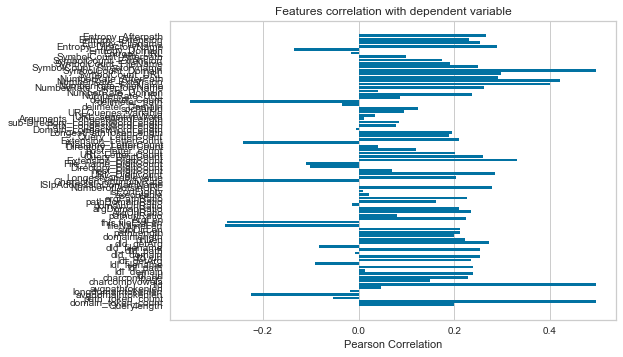

<Figure size 7200x7200 with 0 Axes>

In [55]:
##quick method

visualizer = feature_correlation(x, y, labels=features)
plt.figure(figsize=(100,100))
plt.tight_layout()

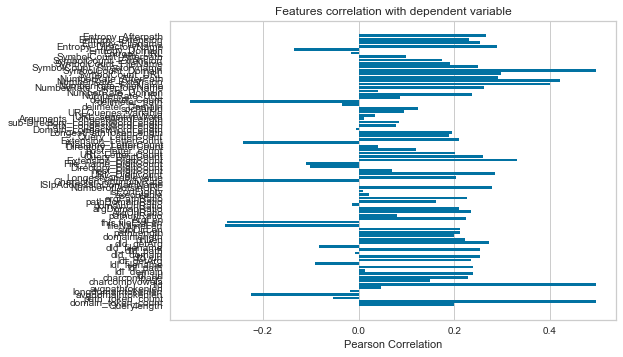

In [56]:
visualizer = FeatureCorrelation(labels=features)

visualizer.fit(x, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure